# Laboratorio 4: Mejorando el Análisis de Sentimientos con LSTM y Características Adicionales


In [9]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input
from tensorflow.keras.models import Model
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#  Cargar los datos de IMDB
max_features = 50000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Mostrar los datos cargados
print(f"Datos de entrenamiento: {len(x_train)}")
print(f"Datos de prueba: {len(x_test)}")

Datos de entrenamiento: 25000
Datos de prueba: 25000


In [4]:
# Establecer el número máximo de palabras por secuencia
maxlen = 500

# Aplicar padding a las secuencias de entrenamiento y prueba para hacerlas de la misma longitud
x_train_padded = pad_sequences(x_train, maxlen=maxlen)
x_test_padded = pad_sequences(x_test, maxlen=maxlen)

# Definir conjuntos de palabras positivas y negativas para el análisis
positive_words = set(['good', 'great', 'excellent', 'amazing', 'wonderful', 'best', 'love', 'like'])
negative_words = set(['bad', 'terrible', 'awful', 'worst', 'hate', 'dislike'])

# Función para obtener la longitud de una crítica
def review_length(review):
    return len(review)

# Función para calcular la proporción de palabras positivas en la crítica
def positive_word_proportion(review):
    return sum(1 for word in review if word in positive_words) / len(review)

# Función para calcular la proporción de palabras negativas en la crítica
def negative_word_proportion(review):
    return sum(1 for word in review if word in negative_words) / len(review)

# Aplicar las funciones definidas a las críticas de entrenamiento y prueba
x_train_lengths = np.array([review_length(review) for review in x_train])
x_train_positive_proportions = np.array([positive_word_proportion(review) for review in x_train])
x_train_negative_proportions = np.array([negative_word_proportion(review) for review in x_train])

x_test_lengths = np.array([review_length(review) for review in x_test])
x_test_positive_proportions = np.array([positive_word_proportion(review) for review in x_test])
x_test_negative_proportions = np.array([negative_word_proportion(review) for review in x_test])

# Agrupar las características adicionales calculadas
x_train_additional_features = np.stack((x_train_lengths, x_train_positive_proportions, x_train_negative_proportions), axis=-1)
x_test_additional_features = np.stack((x_test_lengths, x_test_positive_proportions, x_test_negative_proportions), axis=-1)

# Combinar las secuencias procesadas con las características adicionales en los datos de entrenamiento y prueba
x_train = np.concatenate([x_train_padded, x_train_additional_features], axis=1)
x_test = np.concatenate([x_test_padded, x_test_additional_features], axis=1)

# Mostrar las dimensiones de los conjuntos de datos procesados
print(f"Dimensiones de x_train: {x_train.shape}")
print(f"Dimensiones de x_test: {x_test.shape}") 


Dimensiones de x_train: (25000, 503)
Dimensiones de x_test: (25000, 503)


In [5]:
# Inicializar un modelo secuencial
model = Sequential()

# Añadir una capa de embedding para convertir los índices de palabras en vectores densos
model.add(Embedding(input_dim=50000, output_dim=128))

# Incorporar una capa LSTM para capturar patrones secuenciales de largo plazo
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Añadir una capa completamente conectada con función de activación sigmoide para la salida binaria
model.add(Dense(1, activation='sigmoid'))

# Configurar el modelo con función de pérdida binaria, optimizador Adam y métrica de precisión
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Definir el número de épocas para entrenar el modelo y el tamaño del batch
epochs = 10
batch_size = 32

# Entrenar el modelo usando los datos de entrenamiento y validarlo con los datos de prueba
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

# Evaluar el rendimiento del modelo en los datos de prueba y obtener el puntaje final
score = model.evaluate(x_test, y_test, batch_size=batch_size)

# Imprimir la pérdida y la precisión obtenidas en el conjunto de prueba
print(f"Pérdida en los datos de prueba: {score[0]}")
print(f"Precisión en los datos de prueba: {score[1]}")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 209s 264ms/step - accuracy: 0.6888 - loss: 0.5704 - val_accuracy: 0.8296 - val_loss: 0.4116
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 225s 288ms/step - accuracy: 0.8705 - loss: 0.3286 - val_accuracy: 0.8520 - val_loss: 0.3696
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 223s 285ms/step - accuracy: 0.9154 - loss: 0.2316 - val_accuracy: 0.7985 - val_loss: 0.4549
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 216s 276ms/step - accuracy: 0.8670 - loss: 0.3251 - val_accuracy: 0.8522 - val_loss: 0.3867
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 216s 277ms/step - accuracy: 0.9544 - loss: 0.1319 - val_accuracy: 0.8426 - val_loss: 0.4105
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 216s 276ms/step - accuracy: 0.9658 - loss: 0.0946 - val_accuracy: 0.8533 - val_loss: 0.4781
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 216s 276ms/step - accuracy: 0.9855 - loss: 0.0481 - val_accuracy: 0.8510 - val_loss: 0.5610
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 214s 273ms/step - accuracy: 0.9931 -

In [7]:
# accuracy y loss del modelo 2 decimales. 
print(f"Accuracy: {score[1]:.2f}")
print(f"Loss: {score[0]:.2f}")

model.summary()

Accuracy: 0.84
Loss: 0.74


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 503, 128)       │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,595,141 (74.75 MB)

 Trainable params: 6,531,713 (24.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,063,428 (49.83 MB)

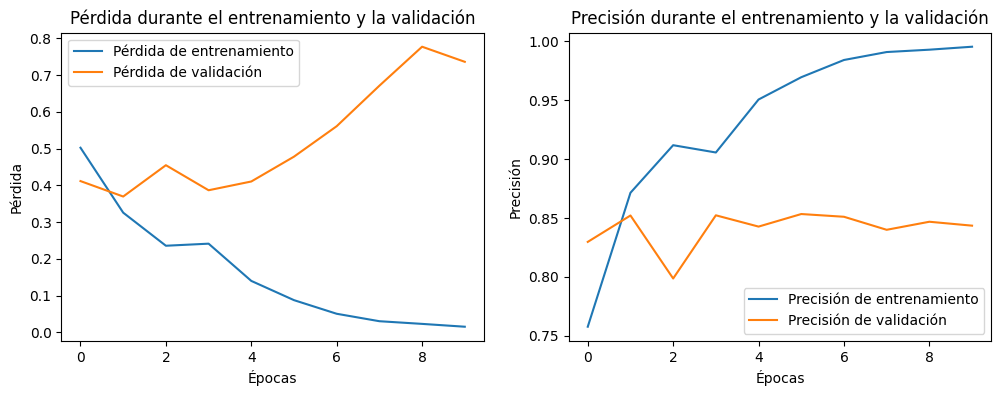

In [8]:
# Grafica de la pérdida y la precisión del modelo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Grafica de la precisión del modelo
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

In [10]:
# Nombre del archivo para guardar el modelo
model_filename = 'modeloEntrenado.h5'

# Guardar el modelo
model.save(model_filename)

print(f"Modelo guardado en {model_filename}")

Modelo guardado en modeloEntrenado.h5
